In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
#importing dataset
resturent_reviews = pd.read_table("C:/Users/Sobhan/Machine Learning/NLP/Restaurant_Reviews.csv")

In [3]:
resturent_reviews.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
resturent_reviews.shape

(1000, 2)

In [5]:
resturent_reviews.isnull().sum()

Review    0
Liked     0
dtype: int64

In [6]:
resturent_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [7]:
resturent_reviews.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [8]:
resturent_reviews["Liked"].value_counts()

1    500
0    500
Name: Liked, dtype: int64

<Axes: >

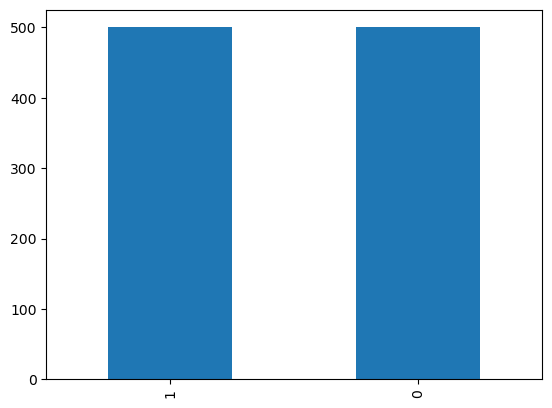

In [9]:
resturent_reviews["Liked"].value_counts().plot(kind = "bar")

In [10]:
#text cleaning
import re
import nltk
nltk.download("stopwords") 
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sobhan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
stemmer = PorterStemmer()
import string
stopword = set(stopwords.words("english"))

In [12]:
def clean_text(text):
    
    text = str(text).lower()  #convert text to lowercase
    text = re.sub("\[.*?\]", " ", text)  #remove any square bracketed text (e.g. [emoji])
    text = re.sub("<.*?>+", " ", text)   #remove any HTML tags
    text = re.sub("https?://\S+|www\.\S+", " ", text)  #remove any URLs or website addresses
    text = re.sub("[%s]" % re.escape(string.punctuation), " ", text)  #remove any punctuation marks
    text = re.sub("\n", " ", text)  #remove any newline characters
    text = re.sub("\w*\d\w*", " ", text) #remove any alphanumeric characters
    text = [word for word in text.split(" ") if word not in stopword] #remove any stop words
    text =" ".join(text)
    text = [stemmer.stem(word) for word in text.split(" ")]  #stem each word
    text =" ".join(text)
    
    return text

In [13]:
print(clean_text)

<function clean_text at 0x0000015A7453CB80>


In [14]:
resturent_reviews["Review"] = resturent_reviews["Review"].apply(clean_text)

In [15]:
resturent_reviews["Review"].iloc[25]

'right    red velvet cake     ohhh stuff good '

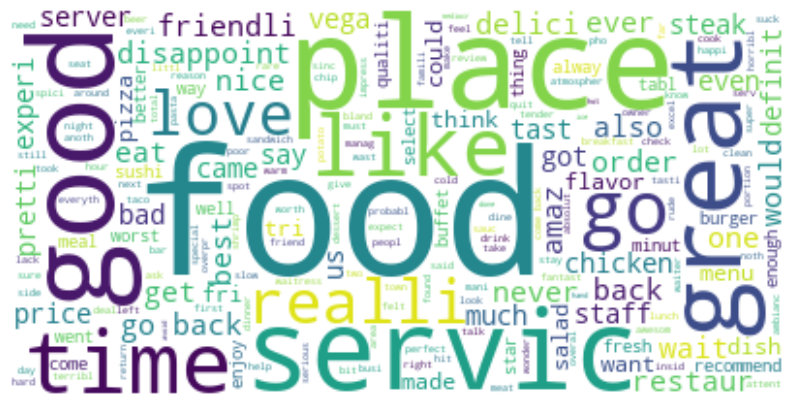

In [16]:
#wordcloud
from wordcloud import WordCloud

text = " ".join(i for i in resturent_reviews.Review)

stopwords = set(stopword)

wordcloud = WordCloud(stopwords = stopwords, background_color = "white").generate(text)

plt.figure(figsize = (10,8))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [17]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(resturent_reviews["Review"]).toarray()
y = resturent_reviews.iloc[:,-1].values

In [18]:
len(X[0])

1561

In [19]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size = 0.2,random_state = 2)

Naive Bayes

In [20]:
GNB_model = GaussianNB()

In [21]:
GNB_model.fit(X_train, y_train)

GaussianNB()

In [22]:
y_prediction = GNB_model.predict(X_test)

In [23]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.87      0.56      0.69       108
           1       0.64      0.90      0.75        92

    accuracy                           0.72       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.76      0.72      0.71       200



Text(50.722222222222214, 0.5, 'Actual')

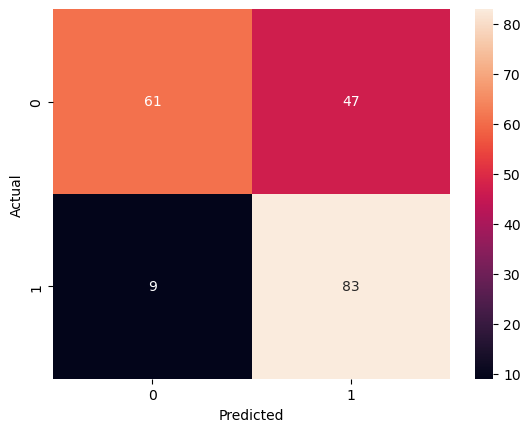

In [24]:
cmatrix = confusion_matrix(y_test, y_prediction)
sns.heatmap(cmatrix,annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

Logistic Regression

In [25]:
logistic_model = LogisticRegression()

In [26]:
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [27]:
y_prediction = logistic_model.predict(X_test)

In [28]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       108
           1       0.79      0.80      0.80        92

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200



Text(50.722222222222214, 0.5, 'Actual')

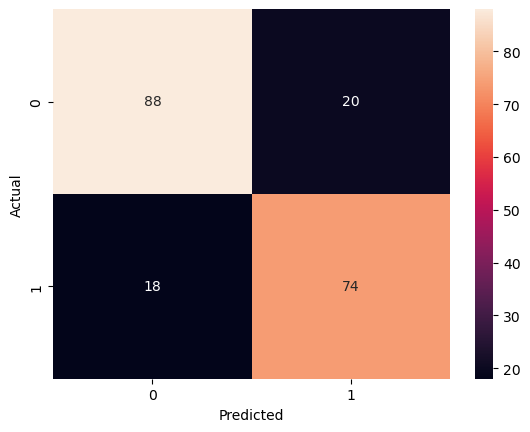

In [29]:
cmatrix = confusion_matrix(y_test, y_prediction)
sns.heatmap(cmatrix,annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

SVM

In [30]:
SVM_model = SVC(kernel = "rbf")

In [31]:
SVM_model.fit(X_train,y_train)

SVC()

In [32]:
y_prediction = SVM_model.predict(X_test)

In [33]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       108
           1       0.85      0.74      0.79        92

    accuracy                           0.82       200
   macro avg       0.82      0.81      0.82       200
weighted avg       0.82      0.82      0.82       200



Text(50.722222222222214, 0.5, 'Actual')

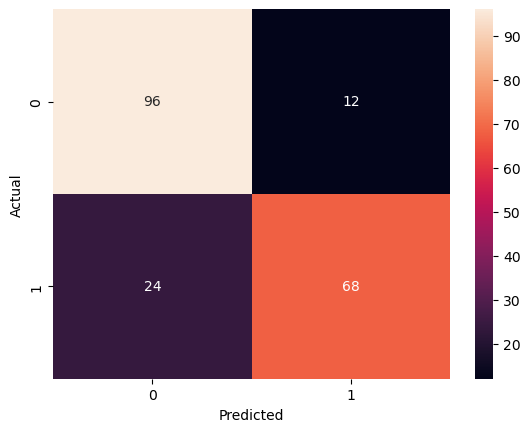

In [34]:
cmatrix = confusion_matrix(y_test, y_prediction)
sns.heatmap(cmatrix,annot = True)
plt.xlabel("Predicted")
plt.ylabel("Actual")